# The DKDEV-Nihoe Model
## Second part

In [8]:
import pandas as pd
import os
import seaborn as sns #tf is this? its your mom
import matplotlib.pyplot as plt
from scipy import stats

df_primary = pd.read_excel("primary.xlsx")#look at this
df_secondary = pd.read_excel("secondary.xlsx")#and this



<AxesSubplot: >

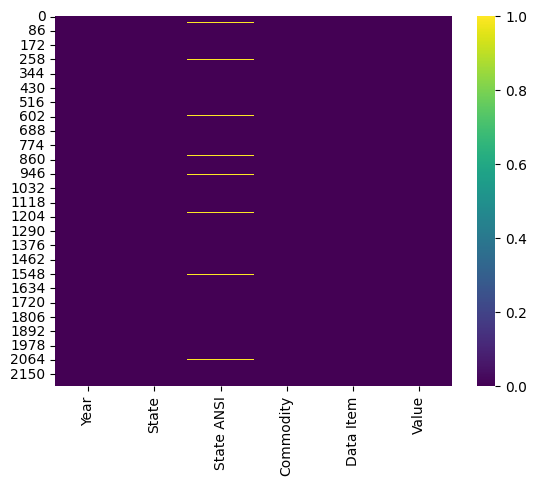

In [3]:
sns.heatmap(df_primary.isnull(), cmap="viridis")

In [9]:
df_primary

,Year,State,State ANSI,Commodity,Data Item,Value
0,2021,ARIZONA,4.0,DATES,"DATES - PRICE RECEIVED, MEASURED IN $ / TON",6350
1,2021,ARIZONA,4.0,PECANS,"PECANS - PRICE RECEIVED, MEASURED IN $ / LB",2.27
2,2021,CALIFORNIA,6.0,ALMONDS,"ALMONDS - PRICE RECEIVED, MEASURED IN $ / LB",1.76
3,2021,CALIFORNIA,6.0,APPLES,"APPLES - PRICE RECEIVED, MEASURED IN $ / LB",0.241
4,2021,CALIFORNIA,6.0,APRICOTS,"APRICOTS - PRICE RECEIVED, MEASURED IN $ / TON",907
...,...,...,...,...,...,...
2216,2000,WASHINGTON,53.0,APRICOTS,"APRICOTS - PRICE RECEIVED, MEASURED IN $ / TON",847
2217,2000,WASHINGTON,53.0,CRANBERRIES,"CRANBERRIES - PRICE RECEIVED, MEASURED IN $ / ...",22.3
2218,2000,WEST VIRGINIA,54.0,APPLES,"APPLES - PRICE RECEIVED, MEASURED IN $ / LB",0.095
2219,2000,WISCONSIN,55.0,APPLES,"APPLES - PRICE RECEIVED, MEASURED IN $ / LB",0.28


# Gameplan
identify which regions are which
pair up with "and this"
sort the data by units


In [15]:
df_primary["Region"]="Region"

In [17]:
region_1=["CONNECTICUT", "IOWA", "ILLINOIS", "INDIANA", "KANSAS", "MASSACHUSETTS", "MAINE", "NEBRASKA", "NEW HAMPSHIRE", "NEW JERSEY", "NEW YORK", "OHIO", "PENNSYLVANIA", "RHODE ISLAND", "VERMONT", "WISCONSIN"]
region_2 = ["ALABAMA", "DELAWARE", "GEORGIA", "KENTUCKY", "MARYLAND", "NORTH CAROLINA", "SOUTH CAROLINA", "TENNESSEE", "VIRGINIA", "WEST VIRGINIA"]
region_3=["ARKANSAS", "FLORIDA", "LOUISIANA", "MISSOURI", "MISSISSIPPI", "NEW MEXICO", "OKLAHOMA", "TEXAS"]
region_4 = ["COLORADO", "MINNESOTA", "MONTANA", "NORTH DAKOTA", "NEVADA", "SOUTH DAKOTA", "UTAH", "WYOMING"]
region_5= ["ALASKA", "IDAHO", "OREGON", "WASHINGTON"]
region_6_7 = ["ARIZONA", "CALIFORNIA", "HAWAII"]
region_names=['REGION 1 (CT IA IL IN KS MA ME MI NE NH NJ NY OH PA RI VT WI)',
       'REGION 2 (AL DE GA KY MD NC SC TN VA WV)',
       'REGION 3 (AR FL LA MO MS NM OK TX)',
       'REGION 4 (CO MN MT ND NV SD UT WY)',
       'REGION 5 (AK ID OR WA)',
       'REGION 6 & 7 (AZ CA HI)']
all_regions=[region_1,region_2,region_3,region_4,region_5,region_6_7]

for index,value in enumerate(df_primary["State"]):
    for index2,region in enumerate(all_regions):
        for state in region:
            if value==state:
                df_primary["Region"][index]=region_names[index2]

print(df_primary)

      Year          State  State ANSI    Commodity  \
0     2021        ARIZONA         4.0        DATES   
1     2021        ARIZONA         4.0       PECANS   
2     2021     CALIFORNIA         6.0      ALMONDS   
3     2021     CALIFORNIA         6.0       APPLES   
4     2021     CALIFORNIA         6.0     APRICOTS   
...    ...            ...         ...          ...   
2216  2000     WASHINGTON        53.0     APRICOTS   
2217  2000     WASHINGTON        53.0  CRANBERRIES   
2218  2000  WEST VIRGINIA        54.0       APPLES   
2219  2000      WISCONSIN        55.0       APPLES   
2220  2000      WISCONSIN        55.0  CRANBERRIES   

                                              Data Item  Value  \
0           DATES - PRICE RECEIVED, MEASURED IN $ / TON   6350   
1           PECANS - PRICE RECEIVED, MEASURED IN $ / LB   2.27   
2          ALMONDS - PRICE RECEIVED, MEASURED IN $ / LB   1.76   
3           APPLES - PRICE RECEIVED, MEASURED IN $ / LB  0.241   
4        APRICOTS - P

/var/folders/n9/ltr1tzxs339bx9p875915k540000gs/T/ipykernel_76591/2453131125.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_primary["Region"][index]=region_names[index2]


In [103]:
df_bob=df_primary[(df_primary.Year<=2017) & (df_primary.Year>=2015)]
# gdf=df[(df.GAME_DATE_EST >= "2021-10-19") & (df.GAME_DATE_EST <= "2022-06-16")]
df_bob=df_bob.drop("State ANSI",axis=1)
df_bob=df_bob.drop("State",axis=1)
df1 = pd.DataFrame({})
df_bob=df_bob.sort_values("Commodity",ascending=True)
unique_values=[]
for crop in df_bob["Commodity"]:
    if crop not in unique_values:
        unique_values.append(crop)
    
for value in unique_values:
    df_new=df_bob[(df_bob.Commodity==value)]
    df_new=df_new.sort_values("Year",ascending=False)
    df_combined = pd.concat([df1,df_new])
    print(df_new)


df_combined.head(10)


     Year Commodity                                     Data Item Value  \
197  2017   ALMONDS  ALMONDS - PRICE RECEIVED, MEASURED IN $ / LB  2.53   
289  2016   ALMONDS  ALMONDS - PRICE RECEIVED, MEASURED IN $ / LB  2.39   
391  2015   ALMONDS  ALMONDS - PRICE RECEIVED, MEASURED IN $ / LB  3.13   

                      Region  
197  REGION 6 & 7 (AZ CA HI)  
289  REGION 6 & 7 (AZ CA HI)  
391  REGION 6 & 7 (AZ CA HI)  
     Year Commodity                                    Data Item  Value  \
258  2017    APPLES  APPLES - PRICE RECEIVED, MEASURED IN $ / LB    (X)   
198  2017    APPLES  APPLES - PRICE RECEIVED, MEASURED IN $ / LB  0.333   
282  2017    APPLES  APPLES - PRICE RECEIVED, MEASURED IN $ / LB  0.549   
280  2017    APPLES  APPLES - PRICE RECEIVED, MEASURED IN $ / LB  0.179   
272  2017    APPLES  APPLES - PRICE RECEIVED, MEASURED IN $ / LB  0.338   
269  2017    APPLES  APPLES - PRICE RECEIVED, MEASURED IN $ / LB  0.217   
268  2017    APPLES  APPLES - PRICE RECEIVED, MEAS

,Year,Commodity,Data Item,Value,Region
308,2016,TANGELOS,"TANGELOS - PRICE RECEIVED, MEASURED IN $ / BOX",22.52,REGION 3 (AR FL LA MO MS NM OK TX)
412,2015,TANGELOS,"TANGELOS - PRICE RECEIVED, MEASURED IN $ / BOX",13.87,REGION 3 (AR FL LA MO MS NM OK TX)


In [ ]:
for x in df_primary:
    print(x)

Year
State
State ANSI
Commodity
Data Item
Value
